In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
# data = load_breast_cancer()
# x = data.data
# y = data.target

In [3]:
import pandas as pd
data = pd.read_csv('datasets/final.csv')
del data['Unnamed: 0']
data.head()

,ID,background_tissue,class,severity,x,y,rad,mean,var,std,min_pixel,max_pixel,min_coor_x,min_coor_y,max_coor_x,max_coor_y
0,mdb001,G,CIRC,B,535,425,197,150.781051,3205.504934,56.617179,5,221,373,710,487,632
1,mdb002,G,CIRC,B,522,280,69,197.870827,764.537398,27.650269,75,229,571,792,531,679
2,mdb005,F,CIRC,B,477,133,30,149.605105,409.222292,20.229243,84,187,481,920,476,876
3,mdb005,F,CIRC,B,500,168,26,162.426214,80.178549,8.954248,128,181,520,841,522,859
4,mdb010,F,CIRC,B,525,425,33,184.385157,127.091607,11.273491,155,208,557,599,519,598


In [4]:
x = data.iloc[:,7:12]
y = data['severity']
di = {'N':0, 'B':1, 'M':2}
y = y.map(di)
y


0      1
1      1
2      1
3      1
4      1
      ..
307    0
308    0
309    0
310    0
311    0
Name: severity, Length: 312, dtype: int64

In [5]:
max_list = [max(x.iloc[:,i]) for i in range(5)]
max_list

[235.7952171, 9077.427598999999, 95.27553516, 214, 242]

In [6]:
#Normalize data
for i in range(5):
    for j in range(len(x)):
        x.iloc[j,i] = x.iloc[j,i]/max_list[i]

In [7]:
x

,mean,var,std,min_pixel,max_pixel
0,0.639458,0.353129,0.594247,0.023364,0.913223
1,0.839164,0.084224,0.290214,0.350467,0.946281
2,0.634470,0.045081,0.212324,0.392523,0.772727
3,0.688844,0.008833,0.093983,0.598131,0.747934
4,0.781972,0.014001,0.118325,0.724299,0.859504
...,...,...,...,...,...
307,0.059514,0.000056,0.007465,0.051402,0.144628
308,0.618812,0.003099,0.055668,0.607477,0.694215
309,0.829444,0.051866,0.227741,0.682243,0.938017
310,0.753895,0.003356,0.057931,0.761682,0.822314


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=42, stratify = y)

# KNN

In [9]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':np.arange(15)}
reg = KNeighborsClassifier()
model = GridSearchCV(reg, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

{'n_neighbors': 12}

In [10]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, y_train)
print("Test set R^2: {:.2f}".format(knn.score(x_test, y_test)))
y_pred = knn.predict(x_test)
y_pred

Test set R^2: 0.59


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [13]:
np.array(y_test)

array([0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0],
      dtype=int64)

In [48]:
y_scores = knn.predict_proba(x_test)
fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [56]:
scores = cross_validate(knn, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.00883293, 0.        , 0.        , 0.00199342, 0.00200152]), 'score_time': array([0.00327587, 0.        , 0.        , 0.00402141, 0.00398874]), 'test_score': array([0.53968254, 0.61904762, 0.5483871 , 0.5       , 0.64516129]), 'train_score': array([0.64658635, 0.6626506 , 0.668     , 0.652     , 0.636     ])}


# SVM


In [15]:
svm = sklearn.svm.SVC(C = 30, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=30)

In [16]:
svm.score(x_train, y_train)


0.6907630522088354

In [17]:
svm.score(x_test, y_test)


0.5714285714285714

In [18]:
y_pred = svm.predict(x_test)


In [50]:
y_scores = svm.predict(x_test)
fpr_svm, tpr_svm, threshold = roc_curve(y_test, y_scores, pos_label= 1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [19]:
from sklearn.model_selection import cross_validate
scores = cross_validate(svm, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.00798392, 0.00549316, 0.00698161, 0.00797749, 0.00603414]), 'score_time': array([0.00249815, 0.00150394, 0.0030086 , 0.0039897 , 0.00198317]), 'test_score': array([0.61904762, 0.68253968, 0.62903226, 0.48387097, 0.61290323]), 'train_score': array([0.6746988 , 0.67871486, 0.672     , 0.736     , 0.68      ])}


# Decision Tree


In [11]:
from sklearn.tree import DecisionTreeClassifier


In [12]:
# tree=DecisionTreeClassifier(max_depth=2,random_state=42)
tree = DecisionTreeClassifier(random_state=42, max_depth=5)

In [13]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [14]:
y_pred = tree.predict(x_test)

In [15]:
print('Độ chính xác tập huấn luyện: {:.4f}'.format(tree.score(x_train, y_train)))
print('Độ chính xác tập kiểm tra: {:.4f}'.format(tree.score(x_test, y_test)))

Độ chính xác tập huấn luyện: 0.7751
Độ chính xác tập kiểm tra: 0.5873


In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [17]:
print_score(tree, x_train, y_train, x_test, y_test, train=False)

Test Result:

accuracy score: 0.5873

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.87      0.76        39
           1       0.25      0.14      0.18        14
           2       0.20      0.10      0.13        10

    accuracy                           0.59        63
   macro avg       0.38      0.37      0.36        63
weighted avg       0.51      0.59      0.53        63


Confusion Matrix: 
 [[34  3  2]
 [10  2  2]
 [ 6  3  1]]



In [51]:
y_scores = tree.predict_proba(x_test)
fpr_tree, tpr_tree, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_tree = auc(fpr_tree, tpr_tree)

In [27]:
scores = cross_validate(tree, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.005584  , 0.00357151, 0.00395918, 0.00397038, 0.00396061]), 'score_time': array([0.00199652, 0.00154519, 0.00299597, 0.00299311, 0.00103235]), 'test_score': array([0.58730159, 0.55555556, 0.51612903, 0.4516129 , 0.56451613]), 'train_score': array([1., 1., 1., 1., 1.])}


# Random forest


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [23]:
print_score(rf, x_train, y_train, x_test, y_test, train=True)
print('\n')
print_score(rf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.9719

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       154
           1       0.96      0.96      0.96        54
           2       0.95      0.93      0.94        41

    accuracy                           0.97       249
   macro avg       0.96      0.96      0.96       249
weighted avg       0.97      0.97      0.97       249


Confusion Matrix: 
 [[152   1   1]
 [  1  52   1]
 [  2   1  38]]

Average Accuracy: 	 0.5778
Accuracy SD: 		 0.0834


Test Result:

accuracy score: 0.6349

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.90      0.80        39
           1       0.33      0.21      0.26        14
           2       0.40      0.20      0.27        10

    accuracy                           0.63        63
   macro avg       0.48      0.44      0.44        63
weighted avg       0.58      0.63      0.59   

In [52]:
y_scores = rf.predict_proba(x_test)
fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1], pos_label= 1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [31]:
scores = cross_validate(rf, x, y, cv=5, scoring=('accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([0.02995563, 0.01495862, 0.01596785, 0.00611329, 0.01565886]), 'score_time': array([0.00398469, 0.00299287, 0.00199795, 0.        , 0.        ]), 'test_score': array([0.57142857, 0.53968254, 0.56451613, 0.5       , 0.56451613]), 'train_score': array([0.97590361, 0.96787149, 0.988     , 0.96      , 0.976     ])}


# Neural Network


In [36]:
# build model
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(5,)))
Dropout(0.25)
model.add(Dense(units=16, activation='relu'))
Dropout(0.25)
model.add(Dense(units=3, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 51        
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [37]:
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42, stratify = y_train)

In [38]:
# y_train = keras.utils.to_categorical(y_train, 3)
# y_val = keras.utils.to_categorical(y_val, 3)
# y_test = keras.utils.to_categorical(y_test, 3)
# print('categorical y_train: ', y_train.shape)
# print('categorical y_val : ', y_val.shape)
# print('categorical y_test : ', y_test.shape)

In [39]:
from tensorflow.keras.optimizers import SGD
# Compile model
epochs = 100
lr = 0.0001
# decay = lr/epochs
# sgd = SGD(lr=lr, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=lr), metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=epochs,
                    verbose=True,
                    validation_data=(x_val, y_val))

Epoch 1/100
6/6 [==============================] - 0s 34ms/step - loss: 1.0705 - accuracy: 0.4885 - val_loss: 1.0746 - val_accuracy: 0.4921
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0809 - accuracy: 0.5218 - val_loss: 1.0744 - val_accuracy: 0.5079
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0735 - accuracy: 0.5376 - val_loss: 1.0742 - val_accuracy: 0.5397
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0683 - accuracy: 0.6355 - val_loss: 1.0741 - val_accuracy: 0.5556
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0732 - accuracy: 0.5708 - val_loss: 1.0739 - val_accuracy: 0.5714
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0715 - accuracy: 0.5657 - val_loss: 1.0738 - val_accuracy: 0.5873
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0688 - accuracy: 0.5937 - val_loss: 1.0736 - val_accuracy: 0.6032
Epoch 8/100
6/6 [=========

In [49]:
# save model as json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model-norm1.h5")
print("Saved model to disk")

Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


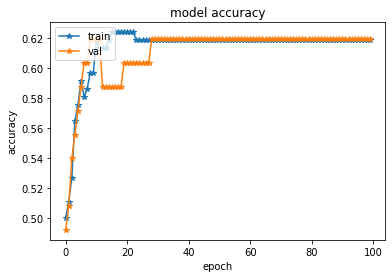

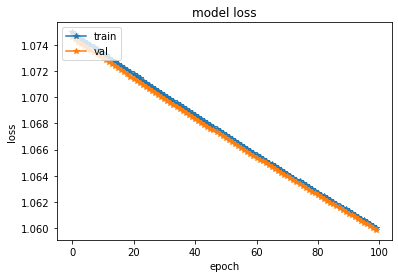

In [41]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], marker = "*")
plt.plot(history.history['val_accuracy'], marker = "*")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], marker = "*")
plt.plot(history.history['val_loss'], marker = "*")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
score = model.evaluate(x_test, y_test, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 1.0599 - accuracy: 0.6190
Test loss: 1.0599404573440552
Test accuracy: 0.6190476417541504


In [54]:
y_scores = model.predict(x_test)
fpr_nn, tpr_nn, threshold = roc_curve(y_test, y_scores, pos_label= 1)
roc_auc_nn = auc(fpr_nn, tpr_nn)

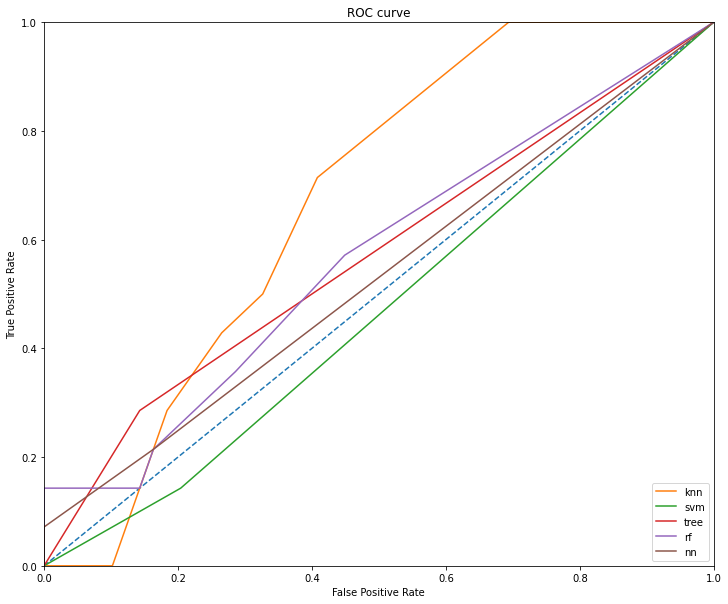

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# 9.2 Also connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
# 9.3 Labels etc
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
# 9.4 Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# 9.5 Plot each graph now
ax.plot(fpr_knn, tpr_knn, label = "knn")
ax.plot(fpr_svm, tpr_svm, label = "svm")
ax.plot(fpr_tree, tpr_tree, label = "tree")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_nn, tpr_nn, label = "nn")

# 9.6 Set legend and show plot
ax.legend(loc="lower right")
plt.show()